In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_data = pd.read_csv('train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#проверка пропущенных данных
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#отбрасывать id, имя, билет
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [ ]:
X = pd.get_dummies(X)

In [ ]:
median_female_age = X[X["Sex_female"] == 1]["Age"].median()
median_male_age = X[X["Sex_male"] == 1]["Age"].median()
print(median_female_age, median_male_age)

27.0 29.0


In [ ]:
X.loc[(X["Sex_female"] == 1) & (X["Age"].isnull()), "Age"] = median_female_age
X.loc[(X["Sex_male"] == 1) & (X["Age"].isnull()), "Age"] = median_male_age

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier()

In [ ]:
tree.plot_tree(clf, rounded=True, filled=True)

[Text(0.45901799302057095, 0.9761904761904762, 'x[5] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.14652045287573467, 0.9285714285714286, 'x[1] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.020990764063811923, 0.8809523809523809, 'x[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.014273719563392108, 0.8333333333333334, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.027707808564231738, 0.8333333333333334, 'x[1] <= 2.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.020990764063811923, 0.7857142857142857, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.03442485306465155, 0.7857142857142857, 'x[4] <= 31.331\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.027707808564231738, 0.7380952380952381, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.04114189756507137, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.27205014168765745, 0.8809523809523809, 'x[0] <= 1.5\ngini = 0.28\nsamples 

Error in callback <function flush_figures at 0x7efd4c9fd360> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
def draw_graphviz(graph):
    import re
    import ipywidgets as widgets
    from IPython.display import SVG, HTML
    from graphviz import Source

    graph = Source(graph)
    image = graph.pipe(format="svg")
    svg = SVG(image)
    svg_data = svg.data
    svg_data = re.sub(
        r'<svg xmlns=\"http://www\.w3\.org/2000/svg\" xmlns:xlink=\"http://www\.w3\.org/1999/xlink\" width=\"\d+pt\" height=\"\d+pt\"',
        '<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="200%" height="200%"',
        svg_data,
    )

    @widgets.interact(scale=widgets.IntSlider(min=30, max=800, step=1, value=100, description="Scale (%):", continuous_update=False))
    def _draw_svg(scale):
        return HTML('<div style="width: {width}%;">{svg}</div>'.format(width=scale, svg=svg_data))
    return _draw_svg

In [ ]:
graph = tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["Died", "Survived"], filled=True)
draw_graphviz(graph)

interactive(children=(IntSlider(value=100, continuous_update=False, description='Scale (%):', max=800, min=30)…

<function __main__.draw_graphviz.<locals>._draw_svg(scale)>

In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_X = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_X = pd.get_dummies(test_X)


In [ ]:
median_female_age_test = test_X[test_X["Sex_female"] == 1]["Age"].median()
median_male_age_test = test_X[test_X["Sex_male"] == 1]["Age"].median()
print(median_female_age_test, median_male_age_test)

27.0 27.0


In [ ]:
test_X.loc[(test_X["Sex_female"] == 1) & (test_X["Age"].isnull()), "Age"] = median_female_age_test
test_X.loc[(test_X["Sex_male"] == 1) & (test_X["Age"].isnull()), "Age"] = median_male_age_test

In [ ]:
test_X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [ ]:
test_X.loc[(test_X["Fare"].isnull()), "Fare"] = test_X["Fare"].median()

In [ ]:
test_X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
y_pred = clf.predict(test_X)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
test_X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Predicted Class
0,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,1
3,3,27.0,0,0,8.6625,0,1,0,0,1,1
4,3,22.0,1,1,12.2875,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1,0,0,1,0
414,1,39.0,0,0,108.9000,1,0,1,0,0,1
415,3,38.5,0,0,7.2500,0,1,0,0,1,0
416,3,27.0,0,0,8.0500,0,1,0,0,1,0


In [ ]:
test_X['Predicted Class'] = y_pred

# Построение графика с использованием Seaborn
sns.pairplot(data=test_X, vars=['Pclass', 'Age','SibSp',	'Parch',	'Fare',	'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q'	,'Embarked_S'], hue='Predicted Class')

# Отображение графика
plt.show()

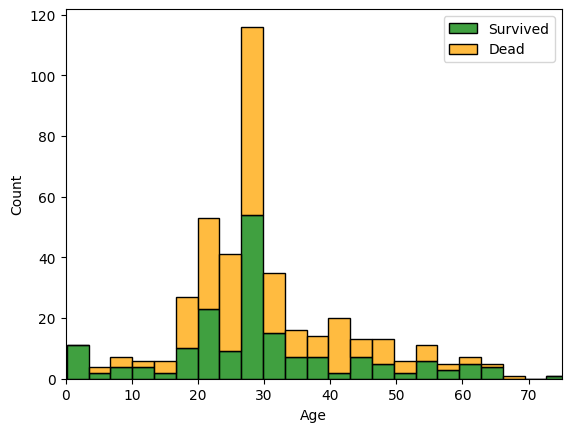

In [ ]:
# Создание графика
fig, ax = plt.subplots()

# Построение гистограммы с разделением по классам и настройкой цветов
sns.histplot(data=test_X, x='Age', hue='Predicted Class', multiple="stack", palette=["orange", "green"], ax=ax)

# Установка масштаба по оси x
ax.set_xlim(0, 75)  # Настройте значения масштаба по вашим данным

# Добавление легенды
ax.legend(['Survived', 'Dead'])

# Отображение графика
plt.show()


In [ ]:
final_X = test_X
final_X.loc[(final_X["Sex_male"] == 1) & (final_X['Predicted Class']==0), "Predicted Class"] = 'male_dead'
final_X.loc[(final_X["Sex_male"] == 1) & (final_X['Predicted Class']==1), "Predicted Class"] = 'male_survived'
final_X.loc[(final_X["Sex_female"] == 1) & (final_X['Predicted Class']==0), "Predicted Class"] = 'male_dead'
final_X.loc[(final_X["Sex_female"] == 1) & (final_X['Predicted Class']==1), "Predicted Class"] = 'female_survived'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
clf.score(X,y)

0.9775533108866442

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier()

In [ ]:
clf.score(X_train,y_train)

0.9697986577181208

In [ ]:
clf.score(X_test,y_test)

0.9932203389830508

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
clf.score(X_train,y_train)

0.8338926174496645

In [ ]:
clf.score(X_test,y_test)

0.823728813559322

**2_4**

In [ ]:
max_depth_values = range(1,100)

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                  'train_score':[train_score],
                                  'test_score':[test_score]})
  scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.842282,0.806780


In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                                                 var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.842282


<Axes: xlabel='max_depth', ylabel='score'>

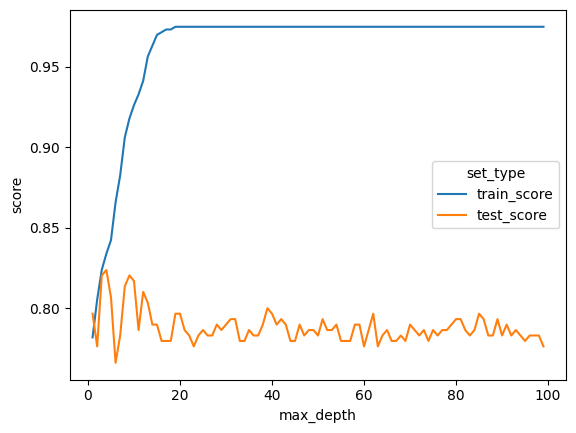

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type',data=scores_data_long)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7903081232492998

In [ ]:
for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

  temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                  'train_score':[train_score],
                                  'test_score':[test_score],
                                  'cross_val_score':[mean_cross_val_score]})
  scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,NaN
0,2,0.805369,0.776271,NaN
0,3,0.823826,0.820339,NaN
0,4,0.833893,0.823729,NaN
0,5,0.842282,0.806780,NaN


In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score','cross_val_score'],
                                                 var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.842282


In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type',data=scores_data_long)